# CALORIES BURNT PREDICTIONS PROJECTS

## Project Overview: 
Building a machine learning Model that can predict the number of calories a person has burnt during workout based on some biological measure. 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

The datasets are in two separate csv files.

In [2]:
#read the Data 
Df1 = pd.read_csv(r"C:\Users\Peter\CALORIES PROJECTS\calories.csv")
Df2 = pd.read_csv(r"C:\Users\Peter\CALORIES PROJECTS\exercise.csv")

print(Df1.head())
print(Df2.head())

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8


In [3]:
# Merge the two separate dataset

calories = pd.merge(Df1, Df2, how='outer')
print(calories)

        User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0      10001159      76.0  female   67   176.0    74.0      12.0       103.0   
1      10001607      93.0  female   34   178.0    79.0      19.0        96.0   
2      10005485      49.0  female   38   178.0    77.0      14.0        82.0   
3      10005630      36.0  female   39   169.0    66.0       8.0        90.0   
4      10006441     122.0    male   23   169.0    73.0      25.0       102.0   
...         ...       ...     ...  ...     ...     ...       ...         ...   
14995  19999044     129.0  female   25   169.0    66.0      22.0       105.0   
14996  19999086      42.0  female   31   170.0    69.0       9.0        93.0   
14997  19999257     112.0    male   21   176.0    75.0      19.0       109.0   
14998  19999394      42.0  female   36   152.0    54.0      10.0        86.0   
14999  19999647     152.0    male   29   164.0    67.0      30.0       102.0   

       Body_Temp  
0           39.6  
1

Let check for shape and size of the dataset

In [4]:
calories.shape

(15000, 9)

In [5]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
calories.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


There are 15000 rows and 9 columns

All column are well filled no missing or Null cells 

# Exploratory Data Analysis

EDA is an approach of analyzing data, by utilizing visual to identify trends, patterns and check for asumptions through statiscal summary and graphical representations. 

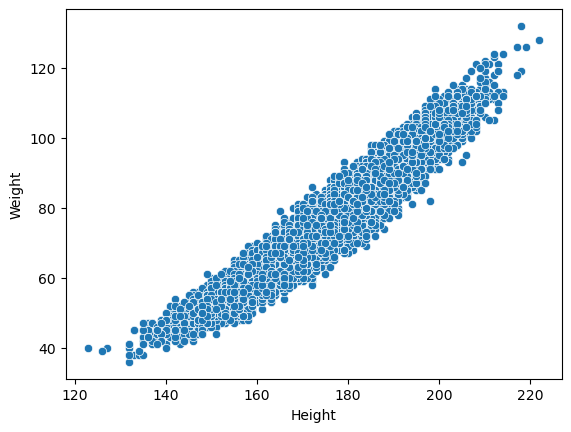

In [7]:
sns.scatterplot(x='Height', y='Weight', data = calories)
plt.show()

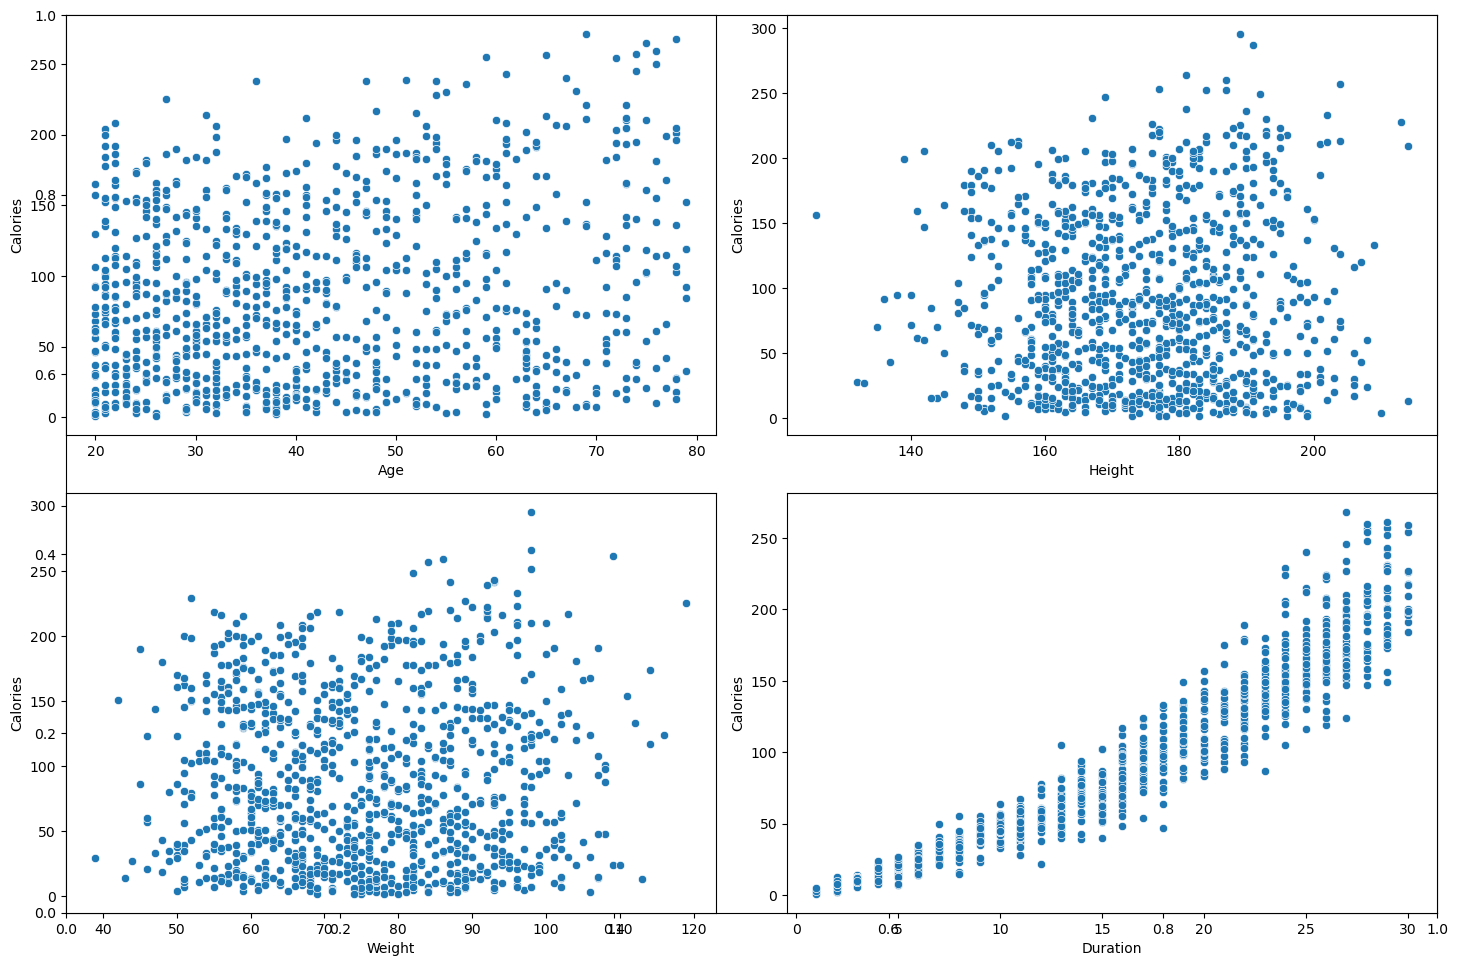

In [8]:
features = [ 'Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    x = calories.sample(1000)
    sns.scatterplot(x = col, y='Calories', data =x)
plt.tight_layout()
plt.show()

#### There exists a Scatter relationship between Calories and Age, Height, weight. But a linear direct relationship between Durations of exercise and calories burnt. This means Durations is a factor to predicts the calories burnts, which means Linear regression can be used. 

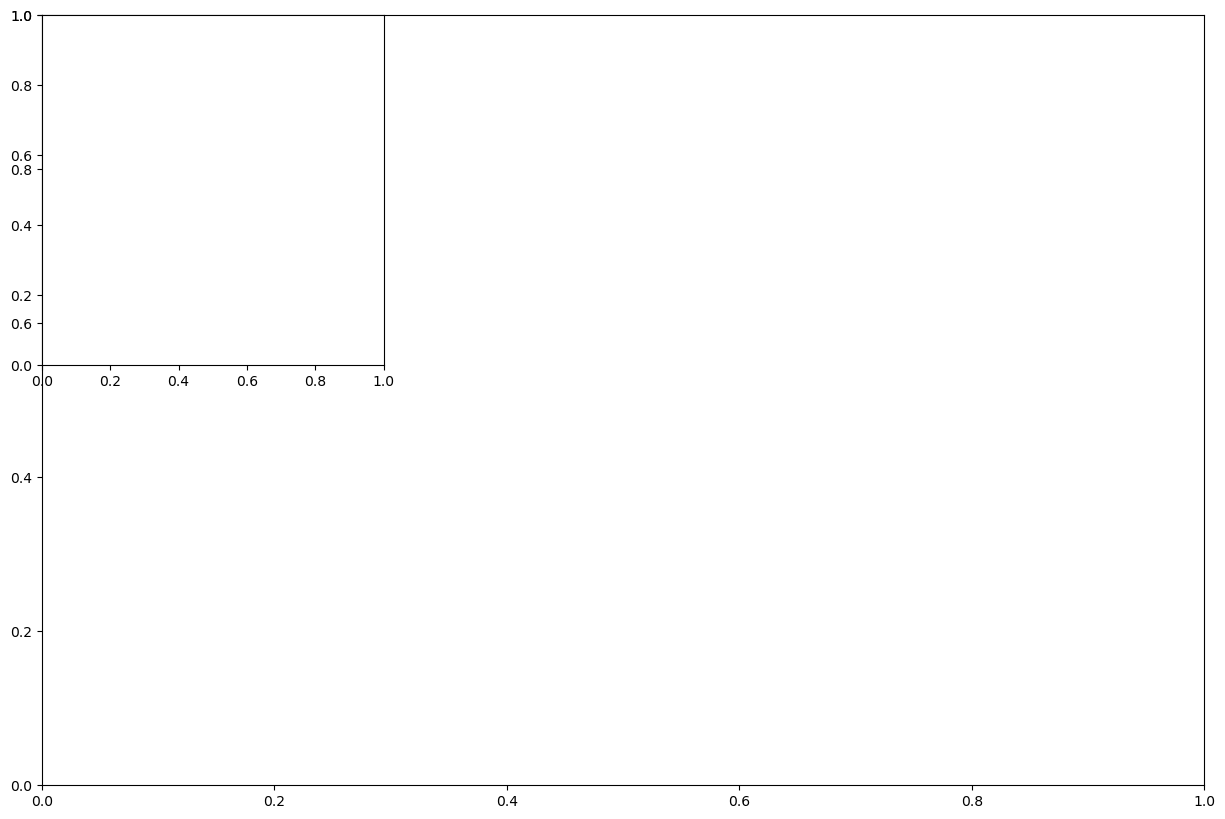

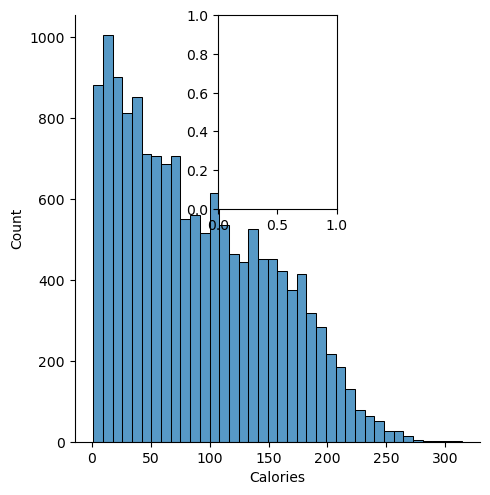

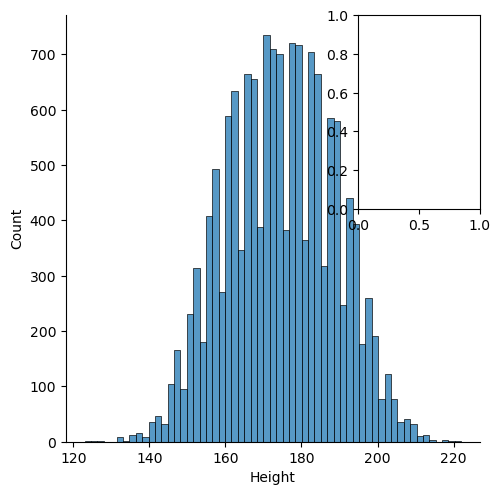

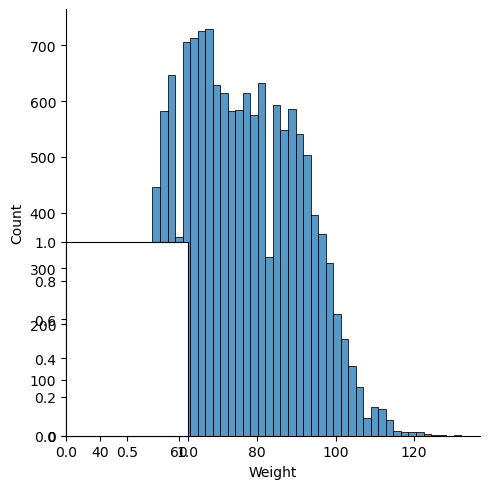

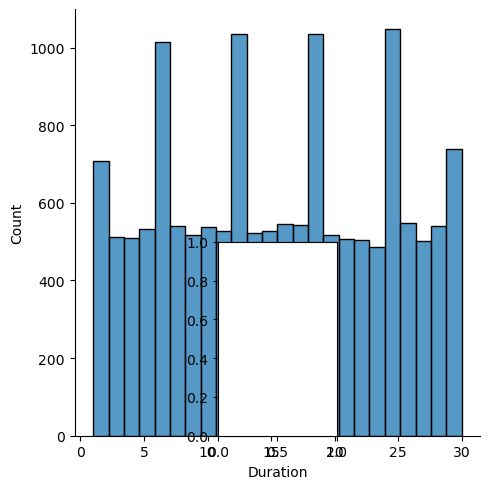

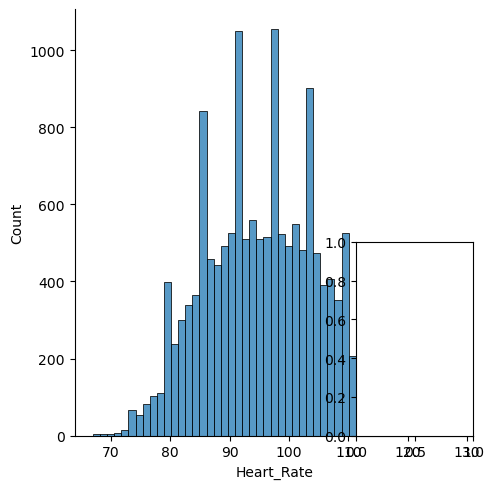

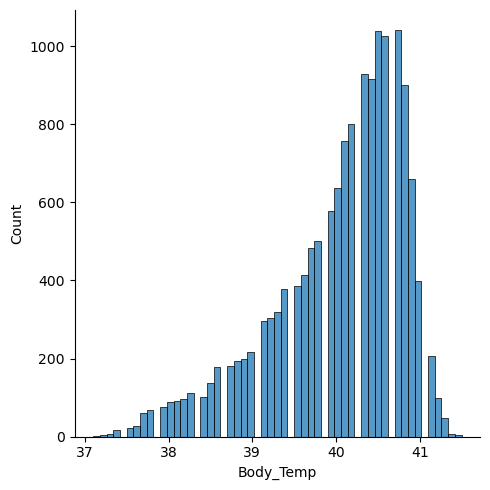

In [10]:
features = calories.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2,3, i+1)
    sns.displot(calories[col])
plt.tight_layout()
plt.show()


In [11]:
#Turn the column whose value is a strings (Gender)

calories.replace({'male': 0, 'female': 1},
           inplace=True)
calories.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001159,76.0,1,67,176.0,74.0,12.0,103.0,39.6
1,10001607,93.0,1,34,178.0,79.0,19.0,96.0,40.6
2,10005485,49.0,1,38,178.0,77.0,14.0,82.0,40.5
3,10005630,36.0,1,39,169.0,66.0,8.0,90.0,39.6
4,10006441,122.0,0,23,169.0,73.0,25.0,102.0,40.7


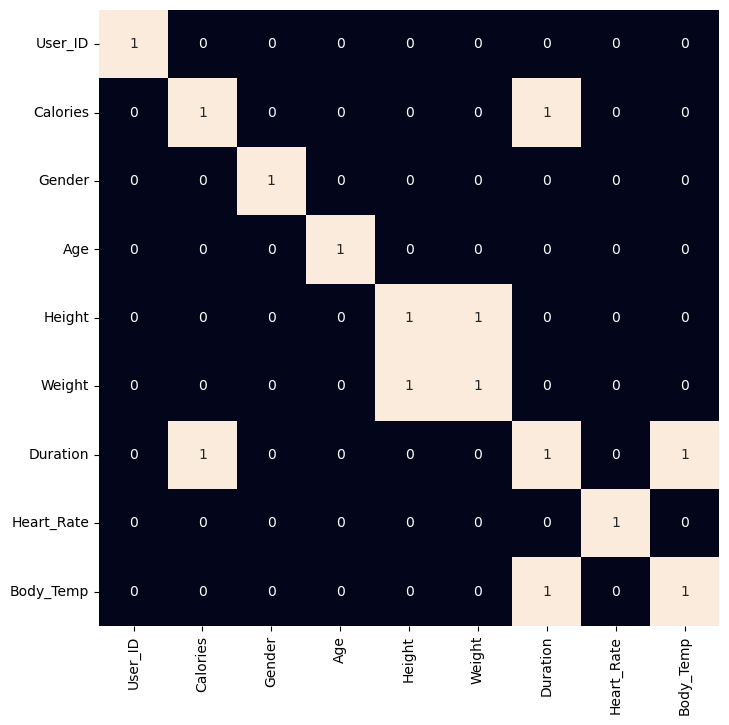

In [12]:
#A heatmap 

plt.figure(figsize=(8,8))
sns.heatmap(calories.corr()>0.9,
            annot=True,
            cbar=False)
plt.show()

A heat map is a two-dimensional representation of data in which values are represented by colors. Correlation Heat map is a two dimensional plot of the amount of correlation (measure of dependence) between variables represented by colors. The varying intensity of color represents the measure of correlation. Correlation is a measure of linear relationship between two variables. Correlation between two variables can also be determined using scatter plot between these two variables. When there are multiple variables, and we want to find the correlation between all of them, a matrix data structure called correlation matrix is used. Correlation values ranges from -1 to +1.

In [14]:
to_remove = ['Weight', 'Duration']
calories.drop(to_remove, axis=1, inplace=True)

# Import modules for Data Science

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
#from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# Create Test and Train dataset

In [17]:
features = calories.drop(['User_ID', 'Calories'], axis=1) # remove the column "User_ID and "calories" since they arent need for predictions
target = calories['Calories'].values # The column to be predicted convert it to numpy array with value

X_train, X_test,\
    Y_train, Y_test = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)  #split the data to test and trian of data. 
X_train.shape, X_test.shape

((13500, 5), (1500, 5))

# Data Preprocessing

In [18]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Model and Predict

In [21]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), 
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_test)
    print('Validation Error : ', mae(Y_test, val_preds))
    print()

LinearRegression() : 
Training Error :  17.92326714155359
Validation Error :  17.98709313328683

Lasso() : 
Training Error :  17.939219940830903
Validation Error :  18.013864803940272

RandomForestRegressor() : 
Training Error :  3.975698987654321
Validation Error :  10.630887523809525

Ridge() : 
Training Error :  17.92334369070917
Validation Error :  17.987209268285117



IndexError: list index out of range